In [1]:
%load_ext autoreload
%autoreload 2
%load_ext Cython

from __future__ import division
from __future__ import print_function

import sys,time,datetime,copy,subprocess,itertools,pickle,warnings,json,gc,numbers

import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

In [8]:
import Hawkes as hk

para = {"mu":0.1, "alpha":0.5, "beta":10.0}
itv = [0,10000]

h1 = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print(len(T))

h2 = hk.estimator().set_kernel('exp').set_baseline('const')
h2.fit(T,itv)
print(h2.para)

print()
%timeit -n1 -r1 h2.fit(T,itv)

1967
mu     0     0.100105
alpha  0     0.491075
beta   0    10.298716
dtype: float64

6.71 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
import Hawkes as hk

para = {"mu":0.1, "alpha":[0.25,0.25], "beta":[1.0,20.0]}
itv = [0,10000]

h1 = hk.simulator().set_kernel('exp',num_exp=2).set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print(len(T))

h2 = hk.estimator().set_kernel('exp',num_exp=2).set_baseline('const')
h2.fit(T,itv)
print(h2.para)

print()
%timeit -n1 -r1 h2.fit(T,itv)

2111
mu     0     0.106019
alpha  0     0.261144
       1     0.236727
beta   0     1.156131
       1    21.990631
dtype: float64

11.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [10]:
import Hawkes as hk

para = {"mu":0.1, "k":0.5,"p":2.0,"c":1.0}
itv = [0,10000]

h1 = hk.simulator().set_kernel('pow').set_baseline('const').set_parameter(para)
T = h1.simulate(itv)
print(len(T))

h2 = hk.estimator().set_kernel('pow').set_baseline('const')
h2.fit(T,itv)
print(h2.para)

print()
%timeit -n1 -r1 h2.fit(T,itv)

1842
mu  0    0.088222
k   0    0.187915
p   0    1.574545
c   0    0.438243
dtype: float64

1.21 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


1239
mu     0     8.830406
       1    19.798958
       2    16.921515
       3     2.581610
       4     1.847218
       5     9.146220
alpha  0     0.190743
beta   0     5.848329
dtype: float64
mu     0    1.179539
       1    0.435673
       2    6.212708
       3   -1.525418
       4    0.887298
       5    9.369292
alpha  0    0.256450
beta   0    4.596452
dtype: float64


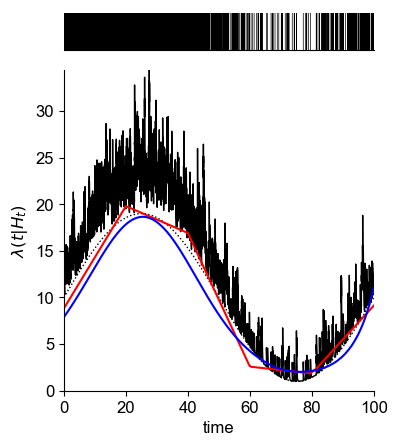

In [13]:
import Hawkes as hk

para = {"alpha":0.2,"beta":10.0}
mu_t = lambda x: 10.0 + 9.0*np.sin(2*np.pi*x/100)
itv = [0,100]
h1 = hk.simulator().set_kernel("exp").set_baseline('custom',l_custom=mu_t).set_parameter(para)
T = h1.simulate(itv)
print(len(T))

# piecewise lienar model
h2 = hk.estimator().set_kernel("exp").set_baseline('plinear',num_basis=6)
h2.fit(T,itv)
print(h2.para)

# log-linear model
h3 = hk.estimator().set_kernel("exp").set_baseline('loglinear',num_basis=6)
h3.fit(T,itv)
print(h3.para)

h1.plot_l()
plt.plot(T,h2.baseline.l(T),"r-")
plt.plot(T,h3.baseline.l(T),"b-")
pass

In [6]:
####################################
## multi seq
####################################

import Hawkes as hk

para = {"mu":0.1, "alpha":0.5, "beta":10.0}
itv = [0,10000]

h1 = hk.simulator().set_kernel('exp').set_baseline('const').set_parameter(para)

T_list = [ h1.simulate(itv) for i in range(10) ]
itv_list = [itv]*10

print([ len(T_list[i]) for i in range(10) ])

h2 = hk.estimator_MultiSeq().set_kernel('exp').set_baseline('const_MultiSeq')
h2.fit(T_list,itv_list,10)

print(h2.para)

[1830, 2145, 2031, 2087, 1927, 1976, 2043, 1842, 2091, 2067]
mu     0    0.099993
alpha  0    0.501009
beta   0    9.826696
dtype: float64
